<a href="https://colab.research.google.com/github/AshimaSharma25/Prog_DS_final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# URLs for confirmed cases and deaths
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into dataframes
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

# Drop unnecessary columns (Latitude, Longitude, etc.)
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

# Aggregate and sum on a global level
global_confirmed_cases = confirmed_cases_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)
global_deaths = deaths_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)

# Create a new dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed_cases.index,
    'Global_Confirmed_Cases': global_confirmed_cases.values,
    'Global_Deaths': global_deaths.values
})

# Display the resulting dataframe
#print(global_data)
global_data


,Date,Global_Confirmed_Cases,Global_Deaths
0,1/24/20,944,26
1,1/25/20,1437,42
2,1/26/20,2120,56
3,1/27/20,2929,82
4,1/28/20,5580,131
...,...,...,...
1136,3/5/23,676024901,6877749
1137,3/6/23,676082941,6878115
1138,3/7/23,676213378,6879038
1139,3/8/23,676392824,6880483


In [ ]:
global_data.to_csv("Coviddata.csv")

Overall American Market >> Microsoft Corporation ( MSFT) Overall Canadian Market >>Canadian Imperial Bank of Commerce (CM) Travel sector >> Carnival Corporation (CCL) The Real Estate sector >> Welltower Inc. (WELL) - One of the largest homebuilders in the United States. Precious metals (Gold, Silver, Platinum, etc) >> Kinross Gold (KGC)

In [3]:
pip install alpha_vantage

In [11]:
####For IBM - American Market
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'O19KRLXOXX687XJX'

# Symbol for the stock you want to retrieve data for
symbol = 'AAL'  # Example: American Airlines Group Inc.

# Date for which you want to get the daily high and low prices
date = '2023-11-24'  # Example: November 24, 2023

# Alpha Vantage API endpoint for daily stock prices
endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

try:
    # Make the API request
    response = requests.get(endpoint)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()

        # Check if the date is available in the response
        if date in data['Time Series (Daily)']:
            # Extract high and low prices for the specified date
            high_price = float(data['Time Series (Daily)'][date]['2. high'])
            low_price = float(data['Time Series (Daily)'][date]['3. low'])

            print(f"For {symbol} on {date}:")
            print(f"High Price: {high_price}")
            print(f"Low Price: {low_price}")
        else:
            print(f"No data available for {symbol} on {date}")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'requests' is not defined


         Date  MSFT_High  MSFT_Low
0     1/24/20   167.5300    164.45
1     1/25/20     0.0000      0.00
2     1/26/20     0.0000      0.00
3     1/27/20   163.3800    160.20
4     1/28/20   165.7600    163.07
...       ...        ...       ...
1136   3/5/23     0.0000      0.00
1137   3/6/23   260.1200    255.98
1138   3/7/23   257.6900    253.39
1139   3/8/23   254.5417    250.81
1140   3/9/23   259.5600    251.58

[1141 rows x 3 columns]


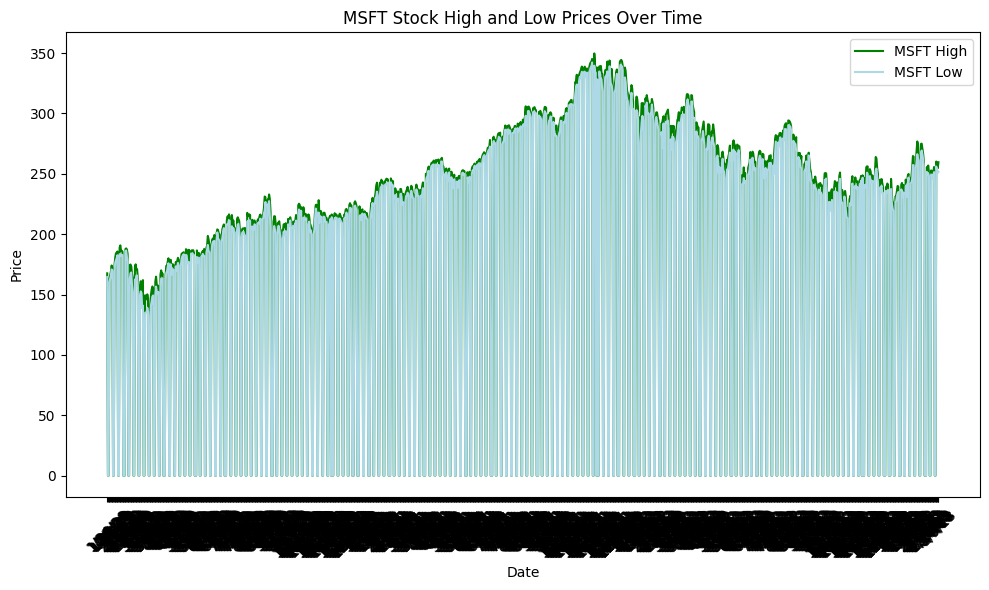

In [12]:

# Create an instance of the TimeSeries class
#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='MSFT', outputsize='full')

for date in global_data['Date']:
  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'MSFT_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'MSFT_Low'] = low_price


print(global_data[['Date', 'MSFT_High', 'MSFT_Low']])

import matplotlib.pyplot as plt

# Assuming global_data contains the DataFrame with Date, MSFT_High, MSFT_Low columns

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(global_data['Date'], global_data['MSFT_High'], label='MSFT High', color='green')
plt.plot(global_data['Date'], global_data['MSFT_Low'], label='MSFT Low', color='lightblue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Stock High and Low Prices Over Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]
      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]


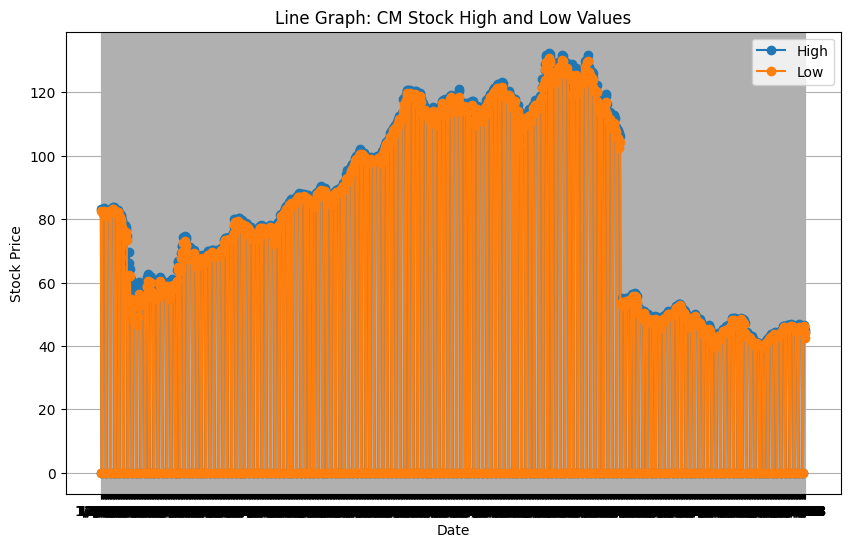

In [13]:
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CM', outputsize='full')
#x=ts.get_daily()
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CM_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CM_Low'] = low_price


print(global_data[[ 'CM_High', 'CM_Low']])
import plotly.graph_objects as go
# Plotting the line graph with high and low values
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
print(global_data[[ 'CM_High', 'CM_Low']])
plt.plot(global_data['Date'], global_data['CM_High'], label='High', marker='o')
plt.plot(global_data['Date'], global_data['CM_Low'], label='Low', marker='o')
plt.title('Line Graph: CM Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Plotting the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=global_data['Date'],
                open=global_data['CM_High'],
                high=global_data['CM_High'],
                low=global_data['CM_Low'],
                close=global_data['CM_Low'])])
fig.update_layout(title='Candlestick Chart: CM Stock',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
# Show the plots
plt.show()
fig.show()

      CCL_High  CCL_Low
0      49.3000   47.120
1       0.0000    0.000
2       0.0000    0.000
3      46.1400   44.730
4      46.8550   45.375
...        ...      ...
1136    0.0000    0.000
1137   11.5300   11.070
1138   11.1950   10.860
1139   10.9698   10.450
1140   10.5900    9.940

[1141 rows x 2 columns]
      CM_High  CM_Low
0      83.150   82.56
1       0.000    0.00
2       0.000    0.00
3      82.550   81.73
4      83.150   82.39
...       ...     ...
1136    0.000    0.00
1137   46.720   46.15
1138   46.220   44.81
1139   44.915   44.21
1140   44.430   42.36

[1141 rows x 2 columns]


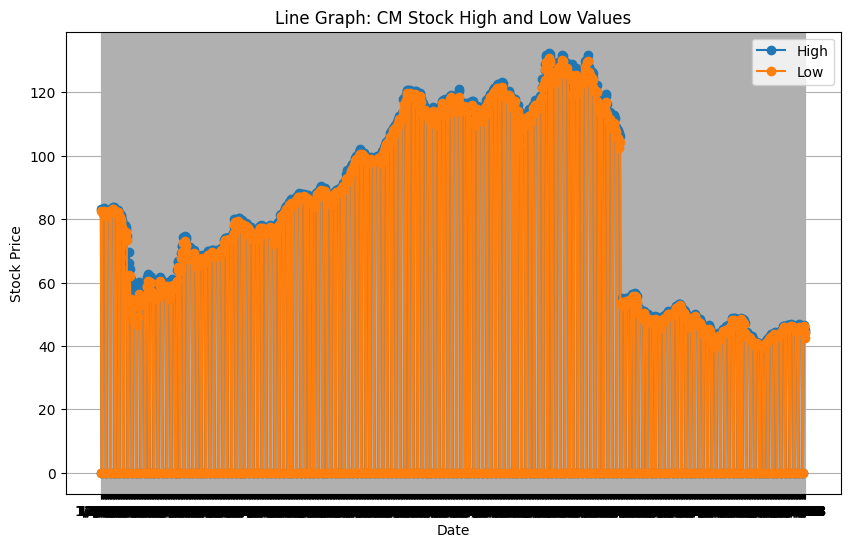

In [14]:
###For Carnival Corporation - Travel sector


ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CCL', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CCL_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CCL_Low'] = low_price


print(global_data[[ 'CCL_High', 'CCL_Low']])

import plotly.graph_objects as go
# Plotting the line graph with high and low values
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
print(global_data[[ 'CM_High', 'CM_Low']])
plt.plot(global_data['Date'], global_data['CM_High'], label='High', marker='o')
plt.plot(global_data['Date'], global_data['CM_Low'], label='Low', marker='o')
plt.title('Line Graph: CM Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Plotting the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=global_data['Date'],
                open=global_data['CM_High'],
                high=global_data['CM_High'],
                low=global_data['CM_Low'],
                close=global_data['CM_Low'])])
fig.update_layout(title='Candlestick Chart: CM Stock',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
# Show the plots
plt.show()
fig.show()

In [15]:
###For Carnival Corporation - Travel sector

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='CCL', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]

  global_data.loc[global_data['Date'] == date, 'CCL_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'CCL_Low'] = low_price


print(global_data[[ 'CCL_High', 'CCL_Low']])

      CCL_High  CCL_Low
0      49.3000   47.120
1       0.0000    0.000
2       0.0000    0.000
3      46.1400   44.730
4      46.8550   45.375
...        ...      ...
1136    0.0000    0.000
1137   11.5300   11.070
1138   11.1950   10.860
1139   10.9698   10.450
1140   10.5900    9.940

[1141 rows x 2 columns]


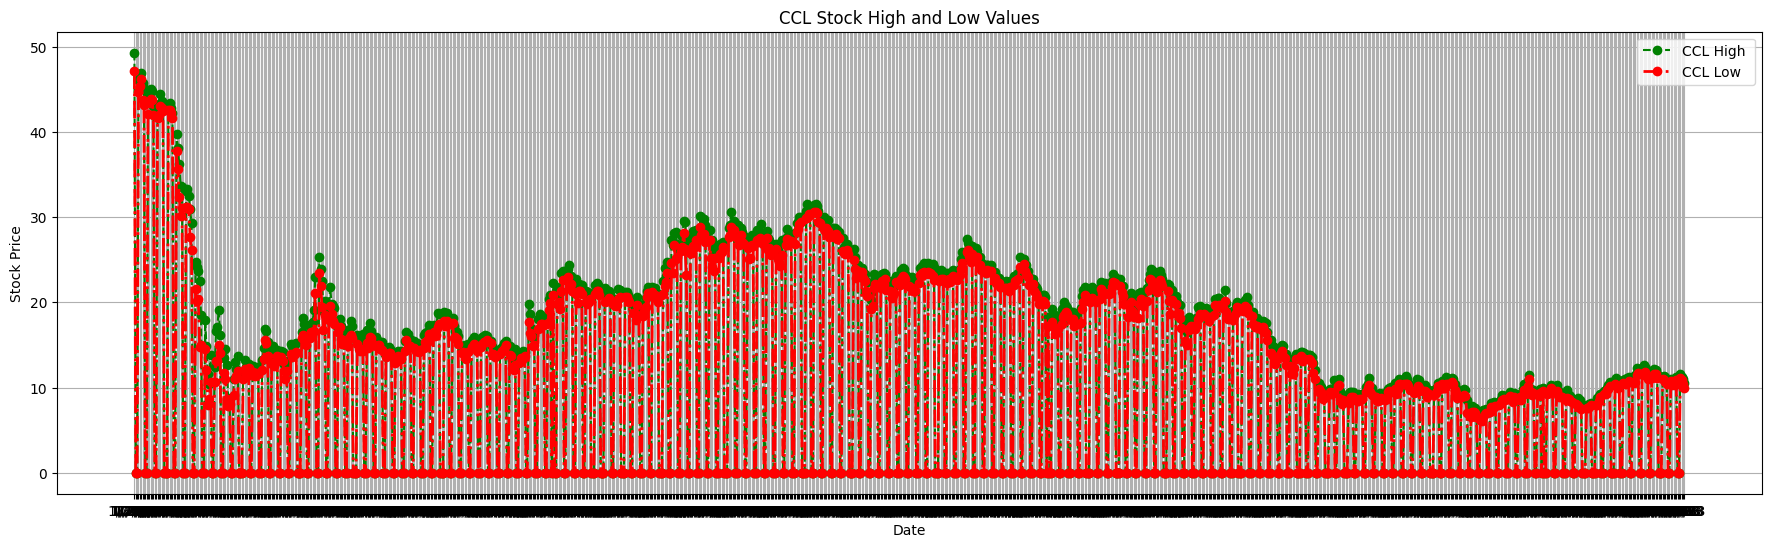

In [16]:
# Plotting the line graph with high and low values for 'EXPE'
plt.figure(figsize=(22, 6))
plt.plot(global_data['Date'], global_data['CCL_High'], label='CCL High ', marker='o', color='green', linestyle='--')
plt.plot(global_data['Date'], global_data['CCL_Low'], label='CCL Low', marker='o', color='red', linestyle='-.', linewidth=2)

# Customize the plot
plt.title('CCL Stock High and Low Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()